<a href="https://colab.research.google.com/github/davidmartine/ProyectoEnergiaColPy/blob/main/EnergiaColV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from google.colab import drive
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LinearRegression


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Conexión Emisón Fosil**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ProyectoAnalisisDatos/Datos/Datagit/emisionfosil_trabajar_2.csv", sep = ";")


  TipoIndustria       Valor  Porcentaje
0        cement   202200790    5.411864
1          coal   792669411   21.215640
2       flaring    71644500    1.917551
3           gas   710304965   19.011172
4           oil  1959430692   52.443774


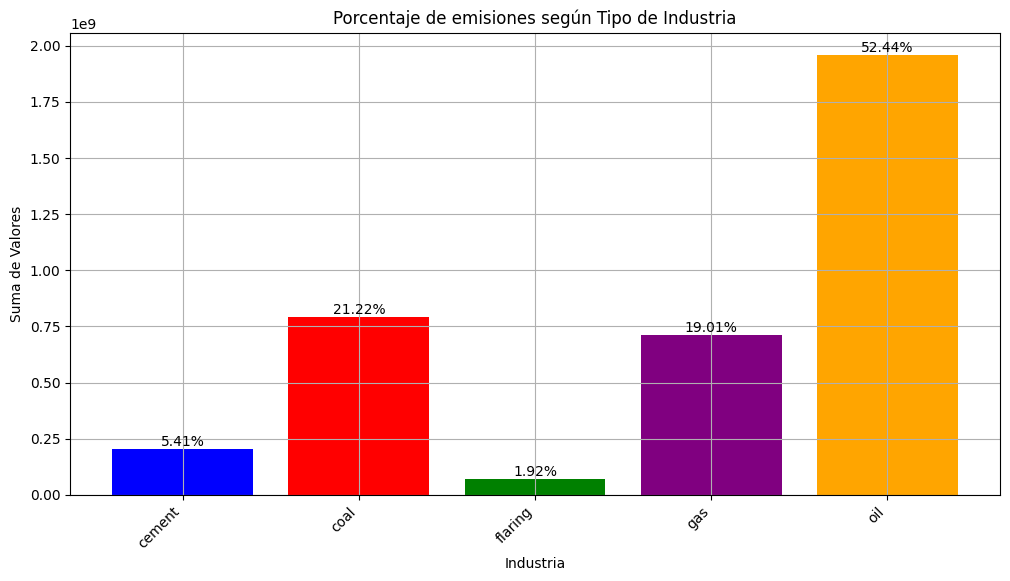

In [6]:
# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

# Limpiar la columna 'TipoIndustria'
df['TipoIndustria'] = df['TipoIndustria'].str.split('from').str[-1].str.strip()

# Reemplazo de valores en la columna 'Valor'
valores_a_reemplazar = {
    51606800: 516068, 104304000: 1043040, 12733700: 127337, 20594400: 2059440,
    83091200: 8309120, 103700000: 1037000, 100020000: 1000200, 104502000: 1045020,
    100345000: 1003450, 20225300: 2022530, 102592000: 1025920, 102958000: 1029580,
    82953000: 8295300, 80534700: 8053470
}
df["Valor"] = df["Valor"].replace(valores_a_reemplazar)

# Agrupar por TipoIndustria y sumar la columna 'Valor'
df_sum = df.groupby('TipoIndustria', as_index=False)['Valor'].sum()

# Calcular el porcentaje de cada industria sobre el total
df_sum["Porcentaje"] = (df_sum["Valor"] / df_sum["Valor"].sum()) * 100

# Verificar valores antes de graficar
print(df_sum)

# Crear la gráfica con Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df_sum['TipoIndustria'], df_sum['Valor'], color=['blue', 'red', 'green', 'purple', 'orange'])

# Agregar etiquetas con porcentaje sobre las barras
for bar, porcentaje in zip(bars, df_sum["Porcentaje"]):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{porcentaje:.2f}%',
            ha='center', va='bottom', fontsize=10, color='black')

# Configurar etiquetas y título
ax.set_xlabel("Industria")
ax.set_ylabel("Suma de Valores")
ax.set_title("Porcentaje de emisiones según Tipo de Industria")
ax.set_xticks(range(len(df_sum["TipoIndustria"])))
ax.set_xticklabels(df_sum['TipoIndustria'], rotation=45, ha='right')

# Guardar la imagen para subirla a GitHub
plt.savefig("grafico_industria.png", bbox_inches="tight")
plt.grid(True)
# Mostrar la gráfica
plt.show()

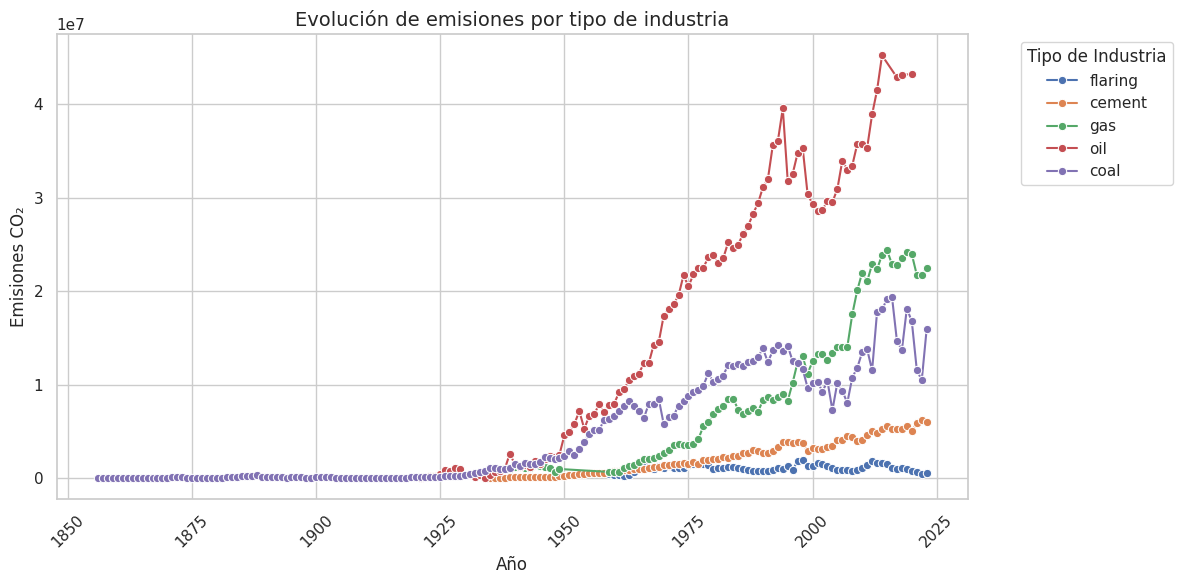

In [7]:
#Creación de Gráfico por Tipo de Industria a través del tiempo
# Convertir columnas a numérico
df['Anio'] = pd.to_numeric(df['Anio'], errors='coerce')
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

# Filtrar valores atípicos
df = df[df['Valor'] > 0]  # Eliminar valores de 0 o negativos
df = df[df['Valor'] < df['Valor'].quantile(0.99)]  # Filtrar outliers extremos

#reemplazo outliers identificados con ceros adicionales
df['Valor'] = df['Valor'].replace(51606800, 516068)
df['Valor'] = df['Valor'].replace(104304000, 1043040)
df["Valor"] = df["Valor"].replace(12733700, 127337)
df["Valor"] = df["Valor"].replace(20594400, 2059440)
df["Valor"] = df["Valor"].replace(83091200, 8309120)
df["Valor"] = df["Valor"].replace(103700000, 1037000)
df["Valor"] = df["Valor"].replace(100020000, 1000200)
df["Valor"] = df["Valor"].replace(104502000, 1045020)
df["Valor"] = df["Valor"].replace(100345000, 1003450)
df["Valor"] = df["Valor"].replace(20225300, 2022530)
df["Valor"] = df["Valor"].replace(102592000, 1025920)
df["Valor"] = df["Valor"].replace(102592000, 1025920)
df["Valor"] = df["Valor"].replace(102958000, 1029580)
df["Valor"] = df["Valor"].replace(82953000, 8295300)
df["Valor"] = df["Valor"].replace(80534700, 8053470)


# Configurar Seaborn para mejor estilo
sns.set_theme(style="whitegrid")

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar cada industria
sns.lineplot(data=df, x="Anio", y="Valor", hue="TipoIndustria", marker="o", ax=ax)

# Mejorar etiquetas y títulos
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Emisiones CO₂", fontsize=12)
ax.set_title("Evolución de emisiones por tipo de industria", fontsize=14)
ax.legend(title="Tipo de Industria", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar diseño
plt.xticks(rotation=45)  # Rotar años para mejor lectura
plt.tight_layout()  # Ajustar el gráfico

fig.show()


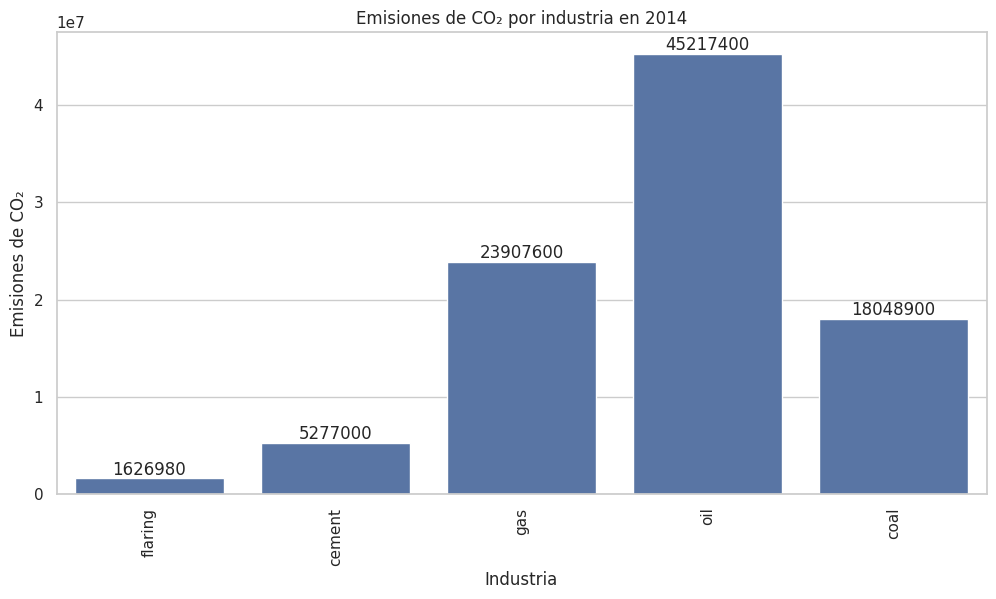

In [8]:
# Gráfico de barras: Emisiones por industria en un años específicos, esto si queremos ver un año puntual y la distribución
anio_filtro = 2014  # Cambiamos acá el año según sea necesario
df_anio = df[df['Anio'] == anio_filtro]
plt.figure(figsize=(12, 6))
sns.barplot(x='TipoIndustria', y='Valor', data=df_anio)
plt.xticks(rotation=90)
plt.xlabel('Industria')
plt.ylabel('Emisiones de CO₂')
plt.title(f'Emisiones de CO₂ por industria en {anio_filtro}')
for i, v in enumerate(df_anio['Valor']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

Año con más emisiones: 2014 con 94077880.00 toneladas de CO₂


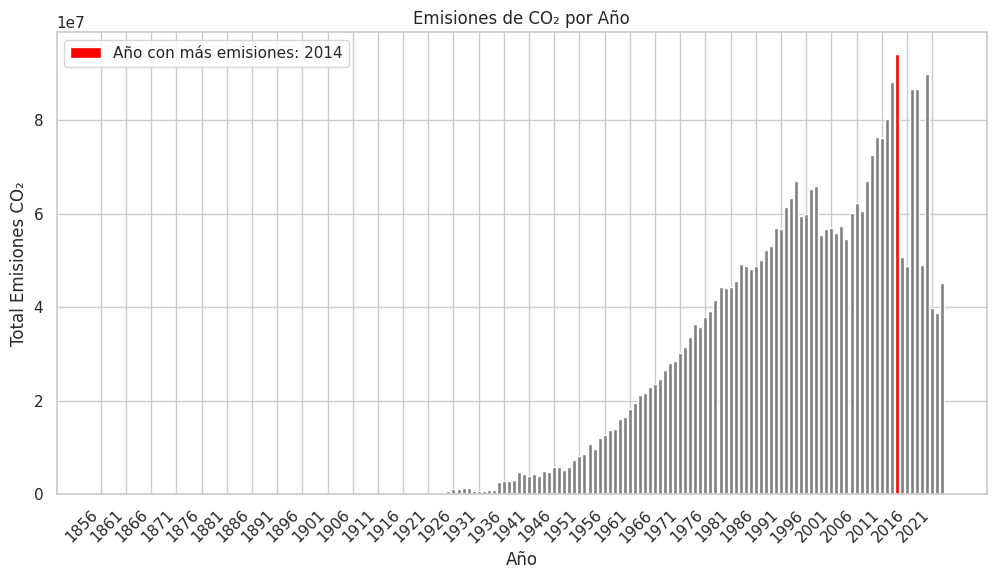

In [10]:
# Agrupar por año y sumar emisiones
emisiones_por_año = df.groupby('Anio')['Valor'].sum()

# Encontrar el año con mayor emisión
año_max = emisiones_por_año.idxmax()
emisiones_max = emisiones_por_año.max()

print(f"Año con más emisiones: {año_max} con {emisiones_max:.2f} toneladas de CO₂")

#en está grafica podemos visualizar año a año el comportamioento de la cantidad de emisiones resaltando el año donde se presenta el pico
plt.figure(figsize=(12, 6))
plt.bar(emisiones_por_año.index, emisiones_por_año.values, color='gray')

# Resaltar el año con más emisiones
plt.bar(año_max, emisiones_max, color='red', label=f"Año con más emisiones: {año_max}")

plt.xlabel("Año")
plt.ylabel("Total Emisiones CO₂")
plt.title("Emisiones de CO₂ por Año")
plt.legend()

# Rotar etiquetas y reducir cantidad mostrada de 5 en 5 años
plt.xticks(emisiones_por_año.index[::5], rotation=45, ha='right')

plt.show()

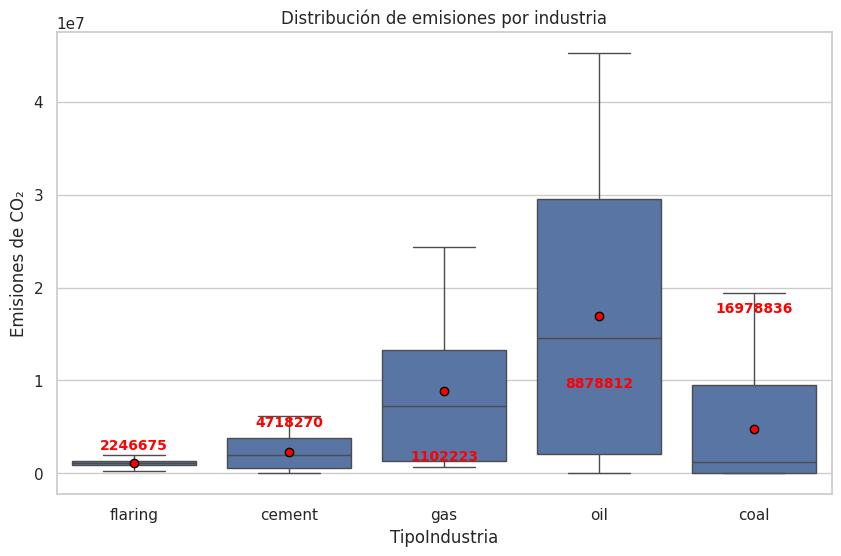

In [11]:
#variabilidad de acuerdo a las medias
#en este caso observamos el carbón tiene la media mas alta en emisiones respecto al petroleo
# y se puede dar ya que para producir una tonelada de energía: esto es 1,5 veces más que el gas; 1,3 veces más que el petróleo

plt.figure(figsize=(10,6))
ax = sns.boxplot(x='TipoIndustria', y='Valor', data=df, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"})

# Agregar etiquetas a la media
medias = df.groupby('TipoIndustria')['Valor'].mean()
for i, mean in enumerate(medias):
    ax.text(i, mean, f'{mean:.0f}', ha='center', va='bottom', color='red', fontsize=10, fontweight='bold')

plt.title('Distribución de emisiones por industria')
plt.xlabel('TipoIndustria')
plt.ylabel('Emisiones de CO₂')
plt.show()

# **Generación Capacidad Electrica**

In [12]:

dataFrame = pd.read_csv('/content/drive/MyDrive/ProyectoAnalisisDatos/Datos/Datagit/generacioncapacidadelectrica.csv', sep=',',encoding='ISO-8859-1')

dataFrame

,IdGeneracionCap,NombreFuente,NombrePais,NombreAnio,NombreUnidad,ValorProduccion
0,1,térmica renovable,colombia,2021,gwh,7.971453e+07
1,2,térmica renovable,colombia,2020,gwh,7.257880e+09
2,3,térmica renovable,colombia,2019,gwh,6.961333e+09
3,4,térmica renovable,colombia,2018,gwh,7.300789e+09
4,5,térmica renovable,colombia,2017,gwh,6.324473e+09
...,...,...,...,...,...,...
171,172,hidro,colombia,2004,gwh,3.984867e+09
172,173,hidro,colombia,2003,gwh,3.719665e+09
173,174,hidro,colombia,2002,gwh,3.467024e+09
174,175,hidro,colombia,2001,gwh,3.243892e+09


In [13]:
dataFrameLD = dataFrame.rename(columns={'NombreFuente':'Nombre Fuente','NombrePais': 'Pais','NombreAnio': 'Año',
                                        'NombreUnidad':'Unidad','ValorProduccion':'Produccion'}).drop(columns=['IdGeneracionCap'])
dataFrameLD[['Nombre Fuente', 'Año', 'Produccion']]
dataFrameLD[dataFrameLD['Produccion'] > 0.0]

,Nombre Fuente,Pais,Año,Unidad,Produccion
0,térmica renovable,colombia,2021,gwh,7.971453e+07
1,térmica renovable,colombia,2020,gwh,7.257880e+09
2,térmica renovable,colombia,2019,gwh,6.961333e+09
3,térmica renovable,colombia,2018,gwh,7.300789e+09
4,térmica renovable,colombia,2017,gwh,6.324473e+09
...,...,...,...,...,...
171,hidro,colombia,2004,gwh,3.984867e+09
172,hidro,colombia,2003,gwh,3.719665e+09
173,hidro,colombia,2002,gwh,3.467024e+09
174,hidro,colombia,2001,gwh,3.243892e+09


In [14]:
suma_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].sum().reset_index()
suma_produccion['Produccion'] = suma_produccion['Produccion'].apply(lambda x: '{:,.0f}K'.format(x / 1e3))
suma_produccion = suma_produccion[suma_produccion['Produccion'] != '0K']
display(suma_produccion)

,Año,Nombre Fuente,Produccion
2,2000,hidro,"3,107,428K"
6,2000,térmica no renovable,"1,009,902K"
7,2000,térmica renovable,"10,479K"
10,2001,hidro,"3,243,892K"
14,2001,térmica no renovable,"1,050,972K"
...,...,...,...
168,2021,eólica,"6,046K"
170,2021,hidro,"6,049,598K"
173,2021,solar,"32,302K"
174,2021,térmica no renovable,"122,569K"


In [15]:
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()
promedio_produccion['Produccion'] = promedio_produccion['Produccion'].apply(lambda x: '{:,.0f}K'.format(x / 1e3))
promedio_produccion = promedio_produccion[promedio_produccion['Produccion'] != '0K']
display(promedio_produccion)

,Año,Nombre Fuente,Produccion
2,2000,hidro,"3,107,428K"
6,2000,térmica no renovable,"1,009,902K"
7,2000,térmica renovable,"10,479K"
10,2001,hidro,"3,243,892K"
14,2001,térmica no renovable,"1,050,972K"
...,...,...,...
168,2021,eólica,"6,046K"
170,2021,hidro,"6,049,598K"
173,2021,solar,"32,302K"
174,2021,térmica no renovable,"122,569K"


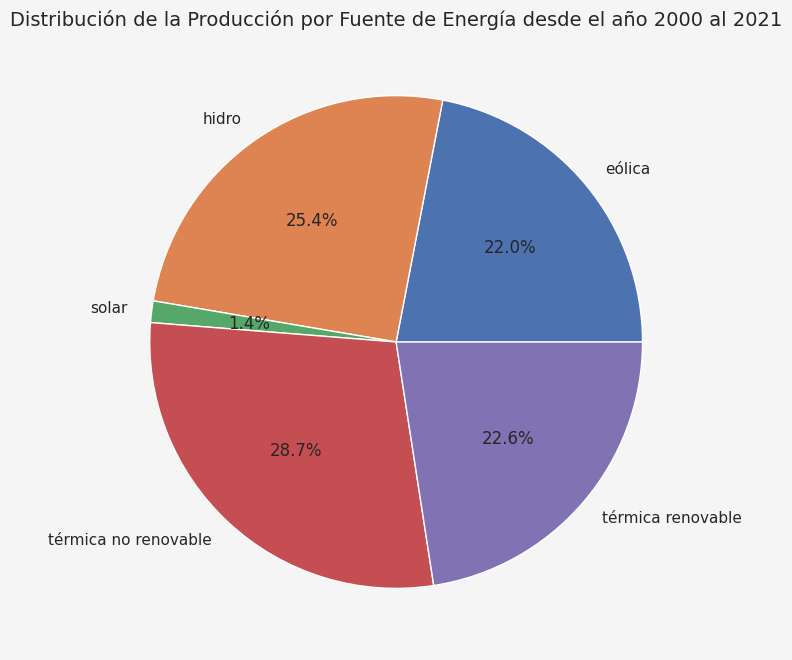

In [17]:
produccion_por_fuente = promedio_produccion.groupby('Nombre Fuente')['Produccion'].apply(
    lambda x: x.str.replace('K', '').str.replace(',', '').astype(float).sum() if x.dtype == 'O' else x.sum()
).reset_index()

# Filtrar y asignar al DataFrame solo las filas donde 'Produccion' es mayor a 0.0
produccion_por_fuente = produccion_por_fuente[produccion_por_fuente['Produccion'] > 0.0]


# Paso 2: Crear la torta
##plt.figure(figsize=(8, 8))
##plt.pie(produccion_por_fuente['Produccion'], labels=produccion_por_fuente['Nombre Fuente'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.figure(figsize=(8, 8) , facecolor='whitesmoke')
plt.pie(produccion_por_fuente['Produccion'], labels=produccion_por_fuente['Nombre Fuente'],autopct='%1.1f%%')
plt.grid(True)

# Paso 3: Personalizar el gráfico
plt.title('Distribución de la Producción por Fuente de Energía desde el año 2000 al 2021', fontsize=14)


# Mostrar el gráfico
plt.show()

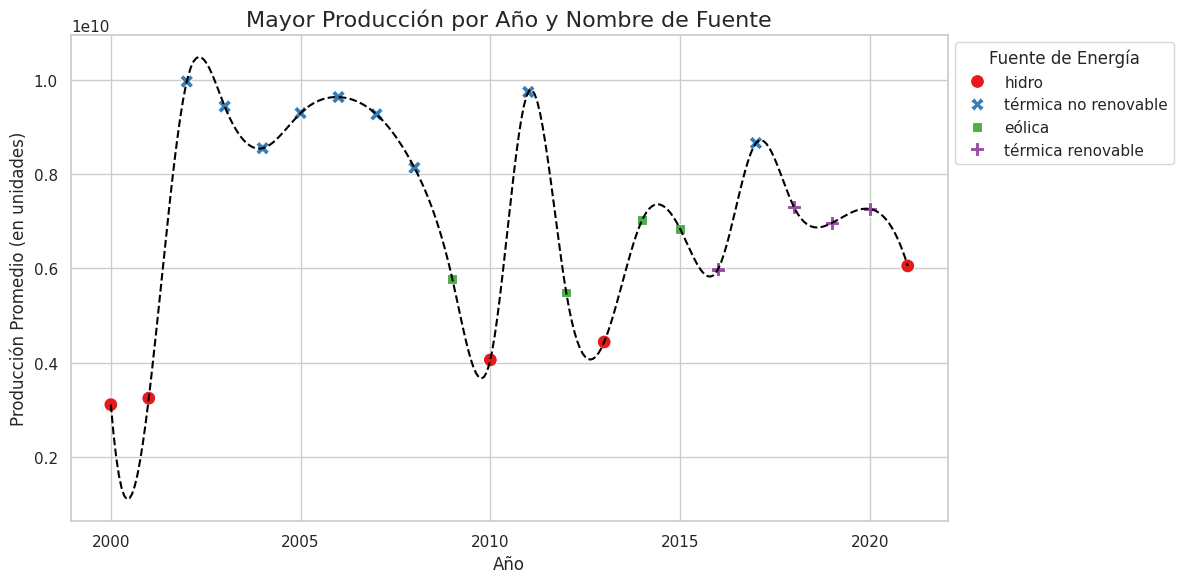

In [18]:

# Paso 1: Agrupar los datos por 'Año' y 'Nombre Fuente' y calcular el promedio de producción
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()

# Paso 2: Encontrar la fuente con la mayor producción por cada año
max_produccion = promedio_produccion.loc[promedio_produccion.groupby('Año')['Produccion'].idxmax()]

# Paso 3: Crear la gráfica de dispersión usando Seaborn
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura

sns.scatterplot(data=max_produccion,
                x='Año',
                y='Produccion',
                hue='Nombre Fuente',  # Colorear los puntos según la fuente
                style='Nombre Fuente',  # Diferenciar los puntos por el estilo
                s=100,  # Tamaño de los puntos
                palette='Set1'
                )  # Elegir la paleta de colores para los puntos

# Extraer los valores de 'Año' y 'Produccion'
x = max_produccion['Año'].values
y = max_produccion['Produccion'].values

# Paso 4: Interpolar para suavizar la línea
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_new)

# Trazar la línea suavizada
plt.plot(x_new, y_smooth, color='black', linestyle='--', linewidth=1.5)

# Paso 4: Personalizar el gráfico
plt.grid(True)
plt.title('Mayor Producción por Año y Nombre de Fuente', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Promedio (en unidades)', fontsize=12)
plt.legend(title="Fuente de Energía", loc='upper left', bbox_to_anchor=(1, 1))  # Leyenda

# Ajustar el layout para evitar que los elementos se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


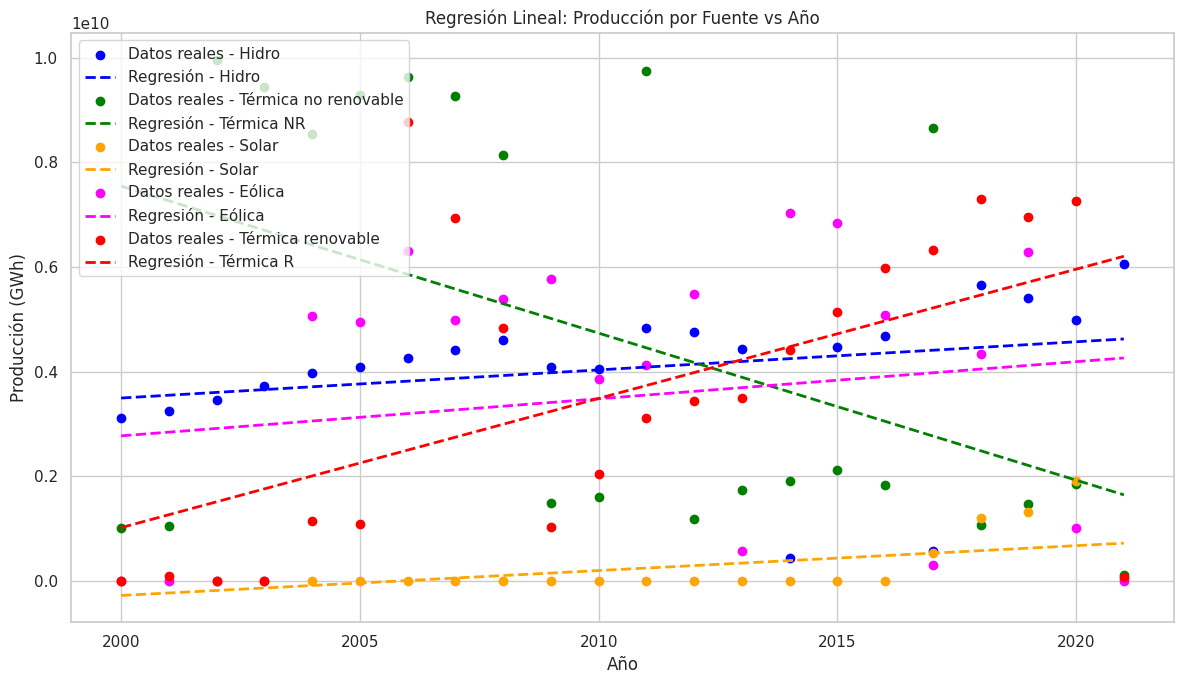

Modelo para Hidro:
  Pendiente: 53,727,229.65 GWh/año
  Intercepto: -103,956,147,914.52 GWh

Modelo para Térmica No Renovable:
  Pendiente: -280,795,331.72 GWh/año
  Intercepto: 569,136,612,030.37 GWh

Modelo para Solar:
  Pendiente: 47,567,264.65 GWh/año
  Intercepto: -95,407,109,888.16 GWh

Modelo para Eólica:
  Pendiente: 70,833,515.96 GWh/año
  Intercepto: -138,891,105,008.44 GWh

Modelo para Térmica Renovable:
  Pendiente: 246,809,473.84 GWh/año
  Intercepto: -492,596,170,392.68 GWh



In [19]:
# 1. Agrupar por Año y Fuente y calcular la producción promedio
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()

# 2. Filtrar los datos para cada fuente y ordenar por Año (incluyendo térmica renovable)
promo_hidro = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'hidro'].sort_values('Año')
promo_termica_nr = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'térmica no renovable'].sort_values('Año')
promo_solar = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'solar'].sort_values('Año')
promo_eolica = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'eólica'].sort_values('Año')
promo_termica_r = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'térmica renovable'].sort_values('Año')

# 3. Ajustar la regresión lineal para cada fuente

# Regresión para Hidro
X_h = promo_hidro[['Año']].values  # Variable independiente (Año)
y_h = promo_hidro['Produccion'].values  # Variable dependiente (Producción)
modelo_h = LinearRegression()
modelo_h.fit(X_h, y_h)
y_pred_h = modelo_h.predict(X_h)

# Regresión para Térmica no renovable
X_t = promo_termica_nr[['Año']].values  # Variable independiente (Año)
y_t = promo_termica_nr['Produccion'].values  # Variable dependiente (Producción)
modelo_t = LinearRegression()
modelo_t.fit(X_t, y_t)
y_pred_t = modelo_t.predict(X_t)

# Regresión para Solar
X_s = promo_solar[['Año']].values  # Variable independiente (Año)
y_s = promo_solar['Produccion'].values  # Variable dependiente (Producción)
modelo_s = LinearRegression()
modelo_s.fit(X_s, y_s)
y_pred_s = modelo_s.predict(X_s)

# Regresión para Eólica
X_e = promo_eolica[['Año']].values  # Variable independiente (Año)
y_e = promo_eolica['Produccion'].values  # Variable dependiente (Producción)
modelo_e = LinearRegression()
modelo_e.fit(X_e, y_e)
y_pred_e = modelo_e.predict(X_e)

# Regresión para Térmica renovable
X_tr = promo_termica_r[['Año']].values  # Variable independiente
y_tr = promo_termica_r['Produccion'].values  # Variable dependiente
modelo_tr = LinearRegression()
modelo_tr.fit(X_tr, y_tr)
y_pred_tr = modelo_tr.predict(X_tr)

# 4. Graficar los puntos reales y las líneas de regresión para cada fuente en una sola figura
plt.figure(figsize=(12, 7))

# Fuente Hidro
plt.scatter(X_h, y_h, color='blue', label='Datos reales - Hidro')
plt.plot(X_h, y_pred_h, color='blue', linestyle='--', linewidth=2, label='Regresión - Hidro')

# Fuente Térmica no renovable
plt.scatter(X_t, y_t, color='green', label='Datos reales - Térmica no renovable')
plt.plot(X_t, y_pred_t, color='green', linestyle='--', linewidth=2, label='Regresión - Térmica NR')

# Fuente Solar
plt.scatter(X_s, y_s, color='orange', label='Datos reales - Solar')
plt.plot(X_s, y_pred_s, color='orange', linestyle='--', linewidth=2, label='Regresión - Solar')

# Fuente Eólica
plt.scatter(X_e, y_e, color='magenta', label='Datos reales - Eólica')
plt.plot(X_e, y_pred_e, color='magenta', linestyle='--', linewidth=2, label='Regresión - Eólica')

# Fuente Térmica renovable
plt.scatter(X_tr, y_tr, color='red', label='Datos reales - Térmica renovable')
plt.plot(X_tr, y_pred_tr, color='red', linestyle='--', linewidth=2, label='Regresión - Térmica R')

plt.xlabel('Año')
plt.ylabel('Producción (GWh)')
plt.title('Regresión Lineal: Producción por Fuente vs Año')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Mostrar coeficientes de cada modelo (incluyendo térmica renovable)
print("Modelo para Hidro:")
print(f"  Pendiente: {modelo_h.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_h.intercept_:,.2f} GWh\n")

print("Modelo para Térmica No Renovable:")
print(f"  Pendiente: {modelo_t.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_t.intercept_:,.2f} GWh\n")

print("Modelo para Solar:")
print(f"  Pendiente: {modelo_s.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_s.intercept_:,.2f} GWh\n")

print("Modelo para Eólica:")
print(f"  Pendiente: {modelo_e.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_e.intercept_:,.2f} GWh\n")

print("Modelo para Térmica Renovable:")
print(f"  Pendiente: {modelo_tr.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_tr.intercept_:,.2f} GWh\n")


# **Zonas No Interconectadas**

In [20]:
dataFrameZNI = pd.read_csv('/content/drive/MyDrive/ProyectoAnalisisDatos/Datos/Datagit/ZonasNoInterconectadas.csv', sep=';',encoding='ISO-8859-1')

dataFrameZNI

,IdZonaNC,NombreDepartamento,NombreMunicipio,Anio,Mes,EnergiaActiva,EnergiaReactiva,DiaDemandaMaxima,PotenciaMaxima,FechaDemandaMaxima,PromedioDiarioHoras
0,3,amazonas,leticia,2024,enero,4059520.0,1044020.0,1,758108.0,1/03/2024,24.00
1,82,amazonas,leticia,2023,enero,3696990.0,1065330.0,27,713296.0,27/01/2023,24.00
2,83,amazonas,el encanto,2023,enero,112349.0,39609.0,24,22898.0,24/01/2023,23.59
3,126,amazonas,leticia,2022,enero,3835280.0,1145150.0,19,71715.0,19/01/2022,24.00
4,127,amazonas,el encanto,2022,enero,104004.0,37309.0,1,22722.0,1/05/2022,23.55
...,...,...,...,...,...,...,...,...,...,...,...
2812,2567,san andrés y providencia,la victoria,2024,diciembre,18531600.0,4696480.0,12,3109110.0,12/11/2024,23.99
2813,2568,san andrés y providencia,la pedrera,2022,diciembre,1138530.0,254554.0,16,182572.0,16/12/2022,24.00
2814,2569,san andrés y providencia,la victoria,2022,diciembre,17303100.0,4700360.0,16,2916410.0,16/12/2022,23.59
2815,2570,san andrés y providencia,la pedrera,2021,diciembre,1000210.0,268745.0,12,172719.0,12/06/2021,24.00


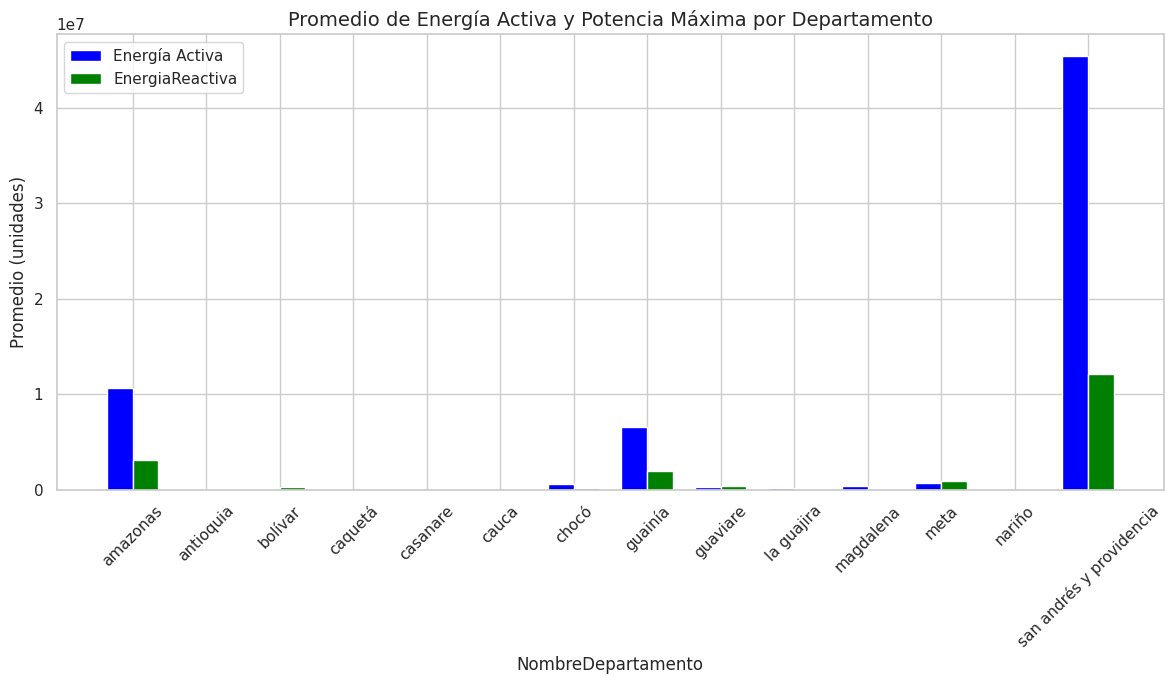

In [33]:
data_agrupada_ano_departamento = dataFrameZNI.groupby(['Anio', 'NombreDepartamento'])[['EnergiaActiva', 'EnergiaReactiva']].mean().reset_index()

# Agrupar los datos por Año y calcular el promedio total de Energía Activa y Potencia Máxima
data_agrupada_ano = data_agrupada_ano_departamento.groupby('NombreDepartamento')[['EnergiaActiva', 'EnergiaReactiva']].sum().reset_index()

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(12, 7))

# Definir el ancho de las barras y las posiciones en el eje x
bar_width = 0.35
index = np.arange(len(data_agrupada_ano))

# Colores para las barras
colors = ['blue', 'green']

# Agregar las barras al gráfico
rects1 = ax.bar(index, data_agrupada_ano['EnergiaActiva'], bar_width, color=colors[0], label='Energía Activa')
rects2 = ax.bar(index + bar_width, data_agrupada_ano['EnergiaReactiva'], bar_width, color=colors[1], label='EnergiaReactiva')

# Etiquetas y título
ax.set_xlabel('NombreDepartamento', fontsize=12)
ax.set_ylabel('Promedio (unidades)', fontsize=12)
ax.set_title('Promedio de Energía Activa y Potencia Máxima por Departamento', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data_agrupada_ano['NombreDepartamento'], rotation=45)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.grid(True)
plt.show()

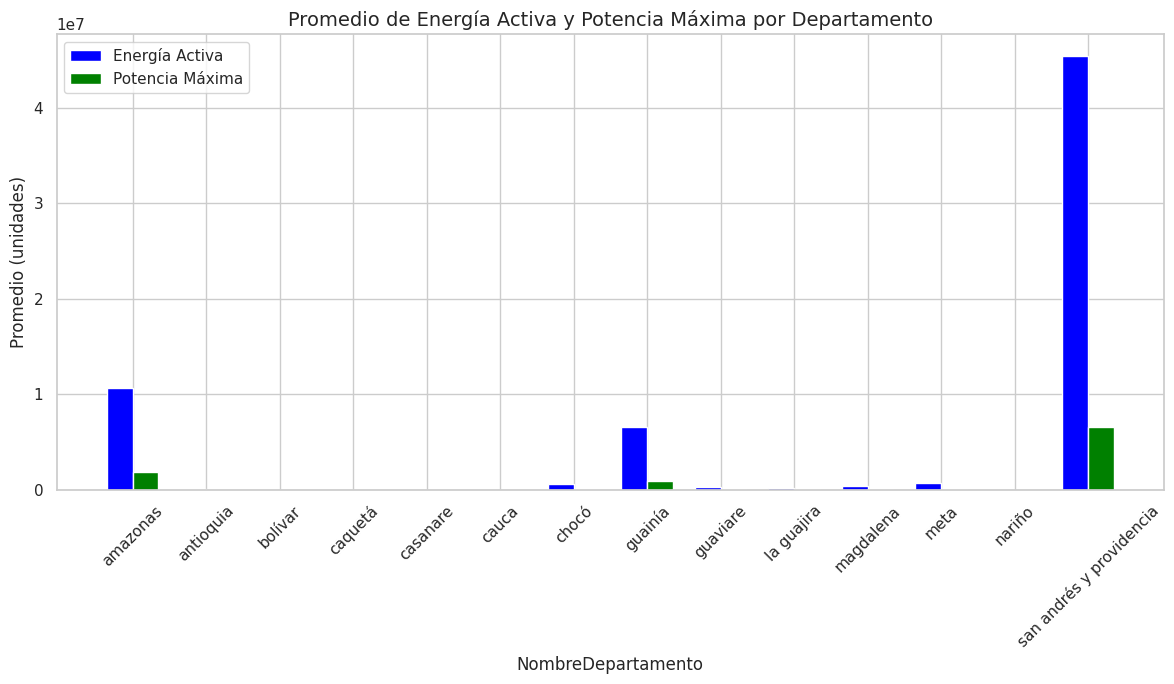

In [32]:
data_agrupada_ano_departamento = dataFrameZNI.groupby(['Anio', 'NombreDepartamento'])[['EnergiaActiva', 'PotenciaMaxima']].mean().reset_index()

# Agrupar los datos por Año y calcular el promedio total de Energía Activa y Potencia Máxima
data_agrupada_ano = data_agrupada_ano_departamento.groupby('NombreDepartamento')[['EnergiaActiva', 'PotenciaMaxima']].sum().reset_index()

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(12, 7))

# Definir el ancho de las barras y las posiciones en el eje x
bar_width = 0.35
index = np.arange(len(data_agrupada_ano))

# Colores para las barras
colors = ['blue', 'green']

# Agregar las barras al gráfico
rects1 = ax.bar(index, data_agrupada_ano['EnergiaActiva'], bar_width, color=colors[0], label='Energía Activa')
rects2 = ax.bar(index + bar_width, data_agrupada_ano['PotenciaMaxima'], bar_width, color=colors[1], label='Potencia Máxima')

# Etiquetas y título
ax.set_xlabel('NombreDepartamento', fontsize=12)
ax.set_ylabel('Promedio (unidades)', fontsize=12)
ax.set_title('Promedio de Energía Activa y Potencia Máxima por Departamento', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data_agrupada_ano['NombreDepartamento'], rotation=45)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.grid(True)
plt.show()

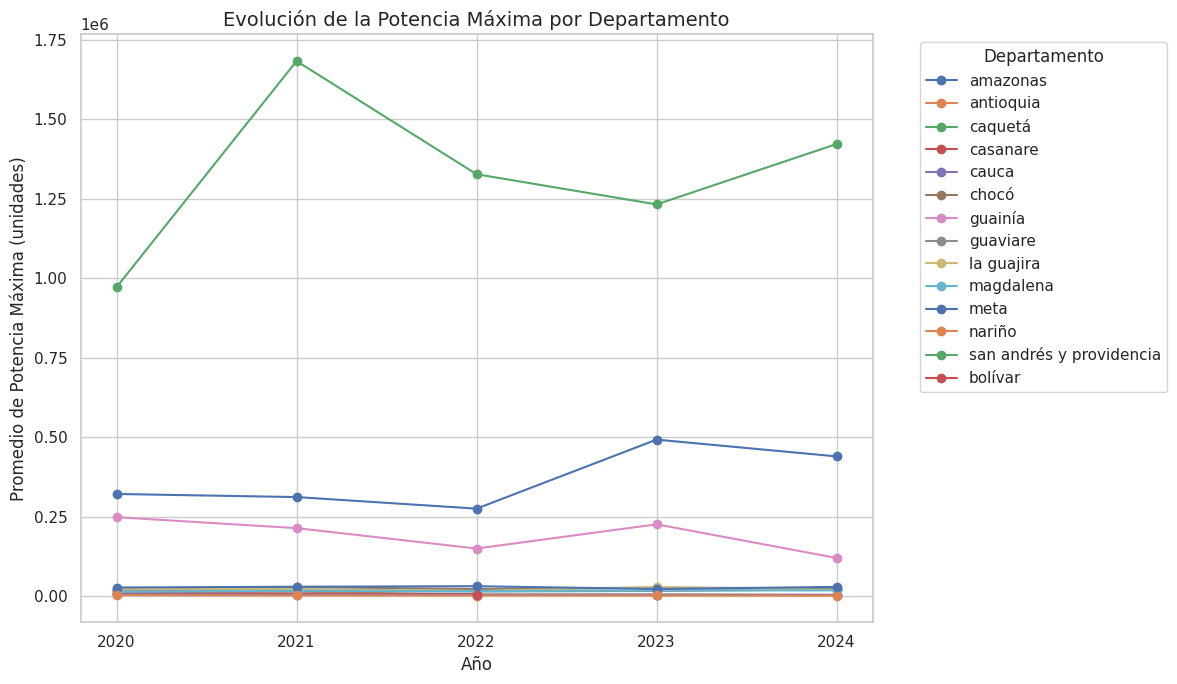

In [34]:
# Agrupar los datos por Año y Municipio, y calcular el promedio de Potencia Máxima
data_tendencia_potencia = dataFrameZNI.groupby(['Anio', 'NombreDepartamento'])['PotenciaMaxima'].mean().reset_index()

# Crear la gráfica de líneas para cada municipio
plt.figure(figsize=(12, 7))

# Iterar sobre cada municipio para dibujar su tendencia
municipios = data_tendencia_potencia['NombreDepartamento'].unique()
for municipio in municipios:
    # Filtrar datos del municipio
    datos_municipio = data_tendencia_potencia[data_tendencia_potencia['NombreDepartamento'] == municipio]
    # Crear la línea
    plt.plot(datos_municipio['Anio'], datos_municipio['PotenciaMaxima'], marker='o', label=municipio)

# Estilo de la gráfica
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Potencia Máxima (unidades)', fontsize=12)
plt.title('Evolución de la Potencia Máxima por Departamento', fontsize=14)
plt.grid(True)
plt.legend(title='Departamento', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del área principal
plt.tight_layout()
plt.show()
